<a href="https://colab.research.google.com/github/claudialeguiza/TP_NLP/blob/navegador/TP_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación

## Introducción

**TUIA - Procesamiento del Lenguaje Natural** - 2023

---

**Trabajo Práctico Nº 1:**

*   "*Procesamiento del Lenguaje*"


**Alumnos:**  

*   Timoteo García
*   Claudia Leguiza
*   Miguel Mussi

## Consignas

### Ejercicio 1

Construir un dataset haciendo web scraping de páginas web de su elección.

* Definir 4 categorías de noticias/artículos.
* Para cada categoría, extraer los siguientes datos de 10 noticias diferentes:
  * url (sitio web donde se publicó el artículo)
  * título (título del artículo)
  * texto (contenido del artículo)

**Recomendaciones**: elegir blogs para evitar los límites de lectura para los medios que exigen suscripción. Investigue sobre el archivo robots.txt y téngalo en cuenta. Considere también espaciar las consultas para evitar saturar el sitio.

Utilizando los datos obtenidos construya el dataset en formato csv.

### Ejercicio 2

Utilizando los datos de título y categoría del dataset del ejercicio anterior, entrenar un modelo de clasificación de noticias en categorías específicas.

### Ejercicio 3

Para cada categoría, realizar las siguientes tareas:
* Procesar el texto mediante recursos de normalización y limpieza.
* Con el resultado anterior, realizar conteo de palabras y mostrar la importancia de las mismas mediante una nube de palabras.

Escribir un análisis general del resultado obtenido.

### Ejercicio 4

Use los modelos de embedding propuestos sobre el final de la Unidad 2 para evaluar la similitud entre los títulos de las noticias de una de las categorías.

Reflexione sobre las limitaciones del modelo en base a los resultados obtenidos, en contraposición a los resultados que hubiera esperado obtener.

### Ejercicio 5

Escriba un programa interactivo que, según la categoría seleccionada por el usuario, devuelva un resumen de las noticias incluidas en ella.

Justifique la elección del modelo usado para tal fin.

**Opcional:** Investigar y programar un bot de Telegram que entregue un resumen de noticias del blog de su elección.

Recomendamos el uso de pyTelegramBotAPI.

# Desarrollo del TP

## Dependecias

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import unicodedata
import nltk
import sklearn as skl
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import SnowballStemmer
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

## Ejercicio 1. Web Scraping

### Categorías

Scrapeo de la Informacion. Obtendremos la Informacion del diario Clarin, y los temas a analizar seran:


*   Economia
*   Politica
*   Sociedad
*   Deportes




**NOTA:** Estan comentadas para que solo sean corridas una vez, y luego se utilice el csv creado

In [ ]:
# temas = ['economia', 'politica', 'sociedad', 'deportes']
# tema_data = []
# titulo_data = []
# enlace_data = []
# texto_data = []

### Scraping

In [ ]:
# for tema in temas:
#   url = f"https://www.clarin.com/{tema}/"

#   # Realiza una solicitud GET al sitio web
#   response = requests.get(url)

#   if response.status_code == 200:
#       # Parsea el contenido de la página web con BeautifulSoup
#       soup = BeautifulSoup(response.text, 'html.parser')

#       # Encuentra los elementos HTML que contienen las noticias
#       noticias = soup.find_all('article', class_='sc-cee0645a-0 bfZwTf')

#       # Itera a través de las noticias y muestra el título y el enlace
#       for noticia in noticias[:10]:
#           titulo = noticia.find('a')['aria-label']
#           enlace = noticia.find('a')['href']
#           articulo = url + enlace
#           noticia_response = requests.get(articulo)
#           if noticia_response.status_code == 200:
#               # Parsea el contenido de la noticia
#               noticia_soup = BeautifulSoup(noticia_response.text, 'html.parser')

#               # Encuentra el elemento HTML que contiene el texto del artículo
#               parrafos = noticia_soup.find_all('div', class_='sc-851b591c-0 cCYlYU container-text')

#               texto_parrafo = ""
#               texto_articulo = "\n".join(parrafo.get_text() for parrafo in parrafos)

#           else:
#               print(f'Error al obtener la noticia: {noticia_response.status_code}')
#           tema_data.append(tema)
#           titulo_data.append(titulo)
#           enlace_data.append(articulo)
#           texto_data.append(texto_articulo)
#           # Agrega un temporizador de 5 segundos
#           time.sleep(5)

#   else:
#       print(f'Error al obtener la página: {response.status_code}')


### DataFrame

In [ ]:
# data = {'Tema': tema_data , 'Título': titulo_data , 'Enlace': enlace_data, 'Noticia': texto_data}
# df = pd.DataFrame(data)

In [ ]:
# Mostrar el DataFrame
# df.shape

In [ ]:
#\df.to_csv('3noticias_clarin.csv', index=False)

### Carga de archivo

In [ ]:
noticias = pd.read_csv('noticias_clarin.csv')
noticias.sample(5)

,Tema,Título,Enlace,Noticia
8,economia,Tras las elecciones repuntaron los plazos fijo...,https://www.clarin.com/economia//economia/elec...,Los resultados de las elecciones del 22 de oct...
22,sociedad,"El ""Erin Brockovich"" de Corrientes: batalló so...",https://www.clarin.com/sociedad//sociedad/erin...,"Sin pensarlo, Raúl Di Si se convirtió en el ""E..."
32,deportes,Horror en el hockey sobre hielo: un jugador es...,https://www.clarin.com/deportes//deportes/horr...,Las imágenes causan conmoción. La trágica mani...
1,economia,Dólar blue hoy: a cuánto cotiza este domingo 2...,https://www.clarin.com/economia//economia/dola...,La cotización del dólar blue es de $960 para l...
29,sociedad,Festival a beneficio del deporte inclusivo,https://www.clarin.com/sociedad//sociedad/fest...,"Este sábado desde las 9, en el Instituto Enriq..."


In [ ]:
noticias['Tema'].value_counts()

economia    10
politica    10
sociedad    10
deportes    10
Name: Tema, dtype: int64

In [ ]:
noticias.describe()

,Tema,Título,Enlace,Noticia
count,40,40,40,40
unique,4,39,40,39
top,economia,"EE.UU. débilitado, el dato central de la guerr...",https://www.clarin.com/economia//economia/euro...,La situación estratégica global de la guerra e...
freq,10,2,1,2


In [ ]:
noticias.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
dtype: bool

In [ ]:
noticias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tema     40 non-null     object
 1   Título   40 non-null     object
 2   Enlace   40 non-null     object
 3   Noticia  40 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


## Procesamiento de texto

### Limpieza del dataset

In [ ]:
# Cambia los nombres de las columnas a minúsculas
noticias.rename(
    columns={col: col.lower() for col in noticias.columns},
    inplace=True
)
#Cambia la letras del contenido de las columnas a minusculas
noticias['título'] = noticias['título'].str.lower()
noticias['noticia'] = noticias['noticia'].str.lower()


In [ ]:
noticias.sample(5)

,tema,título,enlace,noticia
10,politica,por qué córdoba será clave en el balotaje: la ...,https://www.clarin.com/politica//politica/cord...,"desde hace más de una década, córdoba desplazó..."
38,deportes,rosario central vs argentinos jrs. por la copa...,https://www.clarin.com/deportes//deportes/rosa...,argentinos juniors y rosario central se enfren...
26,sociedad,habilitar o no el alcohol en casa: la nueva gr...,https://www.clarin.com/sociedad//sociedad/habi...,"edad de consumo de alcohol en baja, cantidad d..."
21,sociedad,el abc del acv: claves para reducir secuelas y...,https://www.clarin.com/sociedad//sociedad/abc-...,“hay que dejar de referirse al acv como 'accid...
24,sociedad,siliconas pip: todavía hay mujeres que siguen ...,https://www.clarin.com/sociedad//sociedad/sili...,corría 2010 cuando se desató el escándalo que ...


In [ ]:
# Quita espacios en blanco
noticias = noticias.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [ ]:
# Función de eliminación de acentos
def remueve_acentos(texto):
    nfkd_form = unicodedata.normalize('NFKD', texto)
    return''.join([letra for letra in nfkd_form if not unicodedata.combining(letra)])


In [ ]:
# Itera sobre dataframe y llama a la funcion para eliminar acentos
for fila in noticias.index:
  for columna in noticias.columns:
    texto = noticias.loc[fila,columna]
    noticias.loc[fila,columna] = (remueve_acentos(texto))

In [ ]:
# Elimina caracteres de puntuación
noticias['título'] = noticias['título'].str.replace('[^\w\s]', '', regex = True)
noticias['noticia'] = noticias['noticia'].str.replace('[^\w\s]', '', regex = True)

## Ejercicio 2. Modelo de clasificación

In [ ]:
X = noticias['título']
y = noticias['tema']

In [ ]:
X = [' '.join(title) if isinstance(title, list) else title for title in X]

In [ ]:
X

['euro hoy a cuanto cotiza este domingo 29 de octubre',
 'dolar blue hoy a cuanto cotiza este domingo 29 de octubre',
 'eeuu debilitado el dato central de la guerra israelhamas',
 'en el interior fijan topes de \n 10000 para cargar combustibles y cruzan fuerte a sergio massa por el conflicto',
 'las consultoras recalculan la inflacion de octubre por segunda vez cuales son sus previsiones',
 'las petroleras se defienden por la falta de nafta y dicen que en los proximos dias se ira normalizando el abastecimiento',
 'eeuu debilitado el dato central de la guerra israelhamas',
 'los dolares del colchon y de los argentinos en exterior en primer plano',
 'tras las elecciones repuntaron los plazos fijos en pesos vuelve el carry trade',
 'los grandes juicios entre privados ya no se tramitan mas en el pais',
 'por que cordoba sera clave en el balotaje la encuesta de schiaretti y campana sucia a la vista',
 'que dice la constitucion de argentina sobre el voto en blanco',
 'elecciones 2023 en vivo

In [ ]:
steps = [
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression())
]

pipeline = Pipeline(steps)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

In [ ]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.375
              precision    recall  f1-score   support

    deportes       1.00      1.00      1.00         1
    economia       0.00      0.00      0.00         1
    politica       0.50      0.25      0.33         4
    sociedad       0.25      0.50      0.33         2

    accuracy                           0.38         8
   macro avg       0.44      0.44      0.42         8
weighted avg       0.44      0.38      0.37         8



In [ ]:
noticias_nuevas = ["¿Es obligatorio votar en el balotaje de las elecciones 2023 en Argentina?"
                   , "Los pumas finalizaron el mundial de Francia 2023 en el cuarto puesto"
                   , "Cinco dirigentes piqueteros irán a juicio por cortar calles en Córdoba durante una protesta"
                   , "Detuvieron al sospechoso de violar a la empleada de la panadería de Las Cañitas"
                   , "Los 4 motivos por los que el dólar libre bajó por quinto día consecutivo y se aleja del récord"
                   , "Con un golazo de Pratto, Defensa y Justicia iguala 1-1 con Racing por la Copa de la Liga"]

In [ ]:
for noticia in noticias_nuevas:
    categoria = pipeline.predict([noticia])
    print(f"La noticia '{noticia}' es de la categoría: {categoria[0]}.")

La noticia '¿Es obligatorio votar en el balotaje de las elecciones 2023 en Argentina?' es de la categoría: economia.
La noticia 'Los pumas finalizaron el mundial de Francia 2023 en el cuarto puesto' es de la categoría: economia.
La noticia 'Cinco dirigentes piqueteros irán a juicio por cortar calles en Córdoba durante una protesta' es de la categoría: sociedad.
La noticia 'Detuvieron al sospechoso de violar a la empleada de la panadería de Las Cañitas' es de la categoría: politica.
La noticia 'Los 4 motivos por los que el dólar libre bajó por quinto día consecutivo y se aleja del récord' es de la categoría: economia.
La noticia 'Con un golazo de Pratto, Defensa y Justicia iguala 1-1 con Racing por la Copa de la Liga' es de la categoría: deportes.


## Ejercicio 3. Normalización y limpieza

### Normalizacion y tokenizacion de los datos

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
texto_normalizado = noticias.copy()

In [ ]:
# Descarga el conjunto de palabras de parada en español
nltk.download('stopwords')
nltk.download('punkt')
# Elegir las palabras de parada para idioma español
palabra_parada = set(stopwords.words('spanish'))
# Funcion para eliminar las palabras de parada
def remueve_palabras(texto):
  palabra_tokens = word_tokenize(texto)
  texto_filtrado = [palabra for palabra in palabra_tokens \
                    if palabra.casefold() not in palabra_parada]
  return ' '.join(texto_filtrado)

In [ ]:
# Aplicar la funcion anterior a la columna "noticia"
texto_normalizado['noticia'] = texto_normalizado['noticia'].apply(remueve_palabras)
texto_normalizado.sample(5)

,tema,título,enlace,noticia
32,deportes,horror en el hockey sobre hielo un jugador est...,https://www.clarin.com/deportes//deportes/horr...,imagenes causan conmocion tragica maniobra pro...
17,politica,el plan anti milei de massa los consejos de lu...,https://www.clarin.com/politica//politica/plan...,28 agosto pasado despues paso javier milei pre...
4,economia,las consultoras recalculan la inflacion de oct...,https://www.clarin.com/economia//economia/cons...,convulsionado mes octubre aguja precios oscilo...
34,deportes,boca y la cuenta regresiva pensando en flumine...,https://www.clarin.com/deportes//deportes/boca...,sencilla decision jorge almiron dos opciones d...
20,sociedad,alerta en mendoza un gran incendio se desato e...,https://www.clarin.com/sociedad//sociedad/aler...,importante incendio forestal desato sabado noc...


Para dividir el texto a unidades minimas podemos usar


*   Tokenizacion del texto
*   Lematizacion del texto: ademas de separar, reduce las palabras a su forma base asegurando que la palabra raiz pertenezca al idioma.



In [ ]:
# Aplicamos la tokenizacion de palabra a cada instancia de la columna noticia
texto_tokenizado = texto_normalizado.copy()
texto_tokenizado['noticia'] = [word_tokenize(t) for t in texto_normalizado['noticia']]
texto_tokenizado.noticia.sample(5)

38    [argentinos, juniors, rosario, central, enfren...
33    [camino, sido, tan, largo, extenuante, ambos, ...
18    [ricardo, cirielli, reelegido, viernes, secret...
14    [justicia, investiga, alcances, nota, abril, 2...
19    [dirigente, radical, julio, cobos, apelo, part...
Name: noticia, dtype: object

In [ ]:
# Aplicamos lematizacion a todas las instancias de la columna noticia
# Instalar actualizacion de libreria spacy
!pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.


In [ ]:
# Descargamos el paquete de la libreria spacy
!python -m spacy download es_core_news_sm

2023-11-01 23:52:34.953807: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 23:52:34.953881: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 23:52:34.953917: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-01 23:52:34.963809: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-01 23:52:37.776757: W tensorflow/compiler/

In [ ]:
import es_core_news_sm

In [ ]:
# Creamos el objeto
nlp = es_core_news_sm.load()

In [ ]:
def lematizar_palabra(texto):
  doc = nlp(texto)
  texto_filtrado = [palabra.lemma_ for palabra in doc]
  return texto_filtrado

In [ ]:
# Aplicar la función lematizar_palabra a la columna "noticia"
texto_lematizado = texto_normalizado.copy()
texto_lematizado['noticia'] = texto_normalizado['noticia'].apply(lematizar_palabra)
texto_lematizado['noticia'].sample(5)

30    [insolitar, controversia, rodeo, domingo, comp...
39    [cecilia, biagioli, 38, ano, llevar, mas, vein...
38    [argentino, juniors, rosario, central, enfrent...
22    [pensar él, raul, di, si, convirtio, erin, bro...
8     [resultado, elección, 22, octubre, cambiar, hu...
Name: noticia, dtype: object

Observamos que en nuestro idioma genera algunos errores ("decado" en vez de "decada" y "cordobo" en vez de "cordoba").

### Otra forma de normalizar con una funcion

In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
import unidecode

In [ ]:
texto_filtrado = noticias.copy()

In [ ]:
stemmer = SnowballStemmer('spanish')
stop_words = set(stopwords.words('spanish'))

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [unidecode.unidecode(token) for token in tokens]  # Eliminar acentos
    tokens = [token.lower() for token in tokens]  # Convertir a minúsculas
    tokens = [token for token in tokens if token.isalnum()]  # Eliminar signos de puntuación
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]  # Stemming y eliminación de stop words
    return ' '.join(tokens)

In [ ]:
texto_filtrado['noticia'] = texto_filtrado['noticia'].apply(preprocess_text)

In [ ]:
texto_filtrado.drop(['título', 'enlace'], axis = 1, inplace = True)

In [ ]:
texto_filtrado['noticia'] = [word_tokenize(t) for t in texto_filtrado['noticia']]

In [ ]:
texto_filtrado.head()

,tema,noticia
0,economia,"[eur, cotiz, doming, 29, octubr, 36977, compr,..."
1,economia,"[cotiz, dol, blu, 960, compr, 990, vent, domin..."
2,economia,"[situacion, estrateg, global, guerr, israel, h..."
3,economia,"[interior, pais, sigu, viendos, col, aut, cami..."
4,economia,"[convulsion, mes, octubr, aguj, preci, oscil, ..."


In [ ]:
texto_filtrado['noticia'] = texto_filtrado['noticia'].apply(lambda words: ' '.join(words) if isinstance(words, list) else words)

In [ ]:
texto_filtrado.head(5)

,tema,noticia
0,economia,eur cotiz doming 29 octubr 36977 compr 36989 v...
1,economia,cotiz dol blu 960 compr 990 vent doming 29 oct...
2,economia,situacion estrateg global guerr israel ham deb...
3,economia,interior pais sigu viendos col aut camion llen...
4,economia,convulsion mes octubr aguj preci oscil comp va...


In [ ]:
texto_agrupado = texto_filtrado.groupby('tema')['noticia'].apply(''.join).reset_index()

In [ ]:
texto_agrupado.head()

,tema,noticia
0,deportes,insolit controversi rode doming competent marc...
1,economia,eur cotiz doming 29 octubr 36977 compr 36989 v...
2,politica,hac mas dec cordob desplaz ciud buen air segun...
3,sociedad,import incendi forestal desat sab noch zon pie...


### Analisis de frecuencia de palabras

In [ ]:
def contar_palabras(text):
  words = word_tokenize(text)
  fdist_palabra = FreqDist(words)  # Creamos un objeto FreqDist para las palabras
  print("Conteo de palabras", fdist_palabra)
  # dict(fdist_palabra)
  return fdist_palabra

In [ ]:
texto_lematizado.head()

,tema,título,enlace,noticia
0,economia,euro hoy a cuanto cotiza este domingo 29 de oc...,https://www.clarin.com/economia//economia/euro...,"[euro, cotizar, domingo, 29, octubre, 36977, c..."
1,economia,dolar blue hoy a cuanto cotiza este domingo 29...,https://www.clarin.com/economia//economia/dola...,"[cotizacion, dolar, blue, 960, compra, 990, ve..."
2,economia,eeuu debilitado el dato central de la guerra i...,https://www.clarin.com/economia//economia/eeuu...,"[situacion, estrategico, global, guerra, israe..."
3,economia,en el interior fijan topes de \n 10000 para ca...,https://www.clarin.com/economia//economia/inte...,"[interior, pai, seguir, ver él, colos, auto, c..."
4,economia,las consultoras recalculan la inflacion de oct...,https://www.clarin.com/economia//economia/cons...,"[convulsionado, mes, octubre, aguja, precio, o..."


In [ ]:
texto_lematizado['cantidad palabras'] = texto_lematizado['noticia'].apply(lambda x:len(x))

In [ ]:
texto_lematizado.head()

,tema,título,enlace,noticia,cantidad palabras
0,economia,euro hoy a cuanto cotiza este domingo 29 de oc...,https://www.clarin.com/economia//economia/euro...,"[euro, cotizar, domingo, 29, octubre, 36977, c...",226
1,economia,dolar blue hoy a cuanto cotiza este domingo 29...,https://www.clarin.com/economia//economia/dola...,"[cotizacion, dolar, blue, 960, compra, 990, ve...",181
2,economia,eeuu debilitado el dato central de la guerra i...,https://www.clarin.com/economia//economia/eeuu...,"[situacion, estrategico, global, guerra, israe...",431
3,economia,en el interior fijan topes de \n 10000 para ca...,https://www.clarin.com/economia//economia/inte...,"[interior, pai, seguir, ver él, colos, auto, c...",336
4,economia,las consultoras recalculan la inflacion de oct...,https://www.clarin.com/economia//economia/cons...,"[convulsionado, mes, octubre, aguja, precio, o...",356


In [ ]:
texto_lematizado['noticia2'] = texto_lematizado['noticia'].apply(lambda words: ' '.join(words) if isinstance(words, list) else words)
texto_agrupado = texto_lematizado.groupby('tema')['noticia2'].apply(''.join).reset_index()

In [ ]:
texto_agrupado.head()

,tema,noticia2
0,deportes,insolitar controversia rodeo domingo competenc...
1,economia,euro cotizar domingo 29 octubre 36977 compra 3...
2,politica,hacer mas decado cordobo desplazo ciudad bueno...
3,sociedad,importante incendio forestal desato sabado noc...


In [ ]:
texto_agrupado['cantidad palabras'] = texto_agrupado['noticia2'].apply(lambda x:len(x))

In [ ]:
texto_agrupado.head()

,tema,noticia2,cantidad palabras
0,deportes,insolitar controversia rodeo domingo competenc...,23714
1,economia,euro cotizar domingo 29 octubre 36977 compra 3...,27641
2,politica,hacer mas decado cordobo desplazo ciudad bueno...,70642
3,sociedad,importante incendio forestal desato sabado noc...,38398


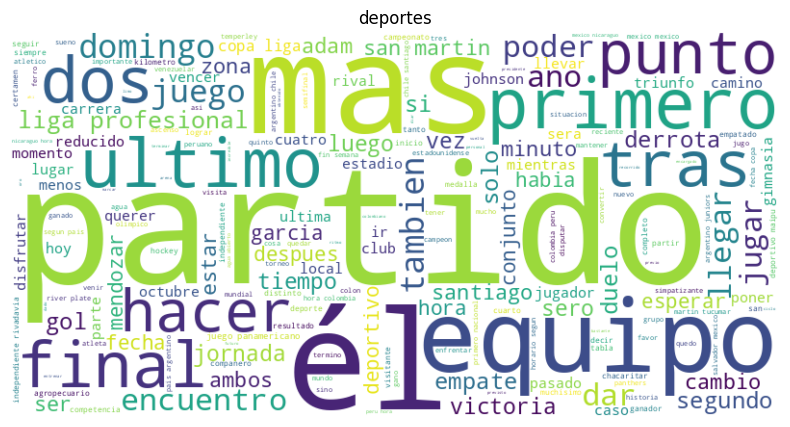

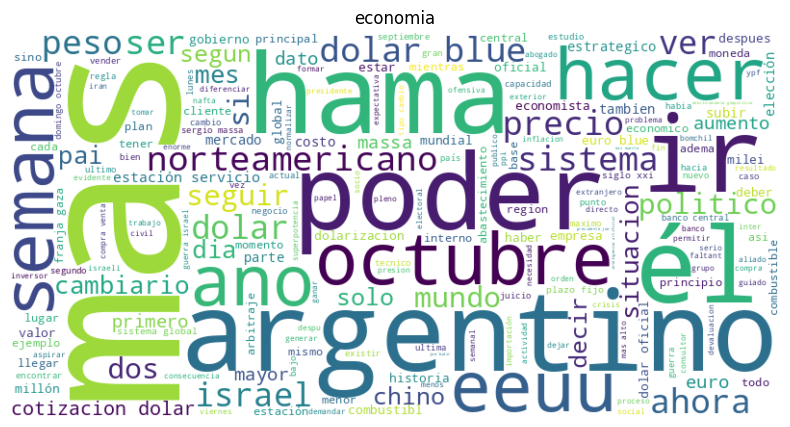

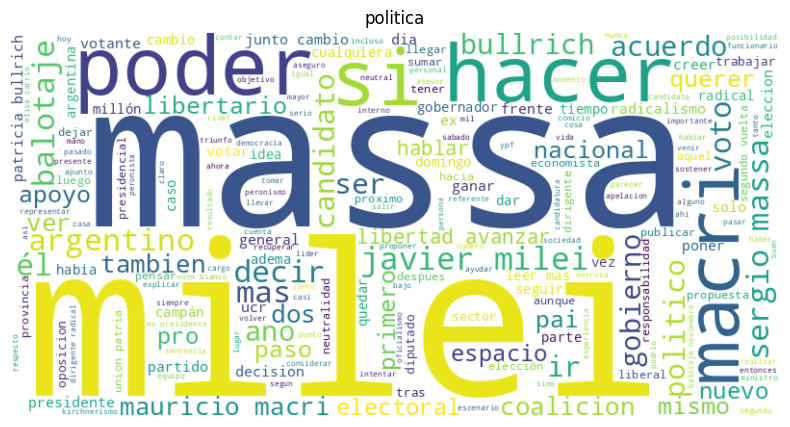

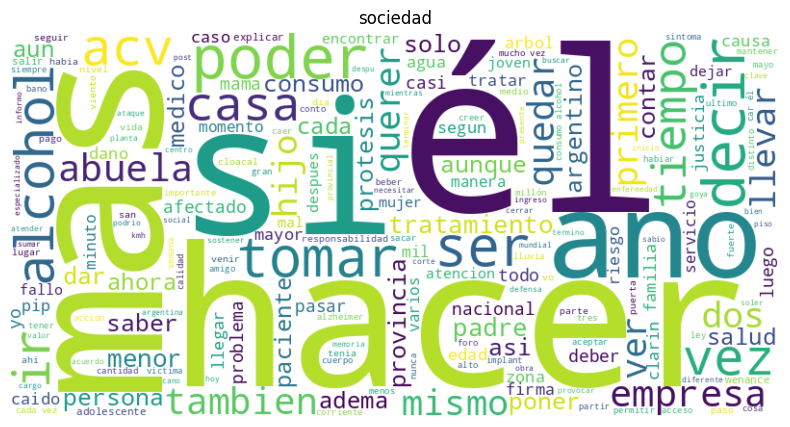

In [ ]:
# Agrupa las noticias por tema
grupos_temas = texto_agrupado.groupby('tema')

for tema, grupo in grupos_temas:
    text = " ".join(grupo['noticia2'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Muestra la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(tema)
    plt.axis("off")
    plt.show()

## Ejercicio 4. Evaluación de similitudes

In [ ]:
!pip install gensim
!wget https://cs.famaf.unc.edu.ar/~ccardellino/SBWCE/SBW-vectors-300-min5.bin.gz

--2023-11-01 23:54:07--  https://cs.famaf.unc.edu.ar/~ccardellino/SBWCE/SBW-vectors-300-min5.bin.gz
Resolving cs.famaf.unc.edu.ar (cs.famaf.unc.edu.ar)... 200.16.17.55
Connecting to cs.famaf.unc.edu.ar (cs.famaf.unc.edu.ar)|200.16.17.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1123304474 (1.0G) [application/x-gzip]
Saving to: ‘SBW-vectors-300-min5.bin.gz’

 SBW-vectors-300-mi  77%[==============>     ] 826.82M  12.1MB/s    eta 22s    ^C


In [ ]:
texto = texto_lematizado[['tema', 'título']]

In [ ]:
texto.head(15)

,tema,título
0,economia,euro hoy a cuanto cotiza este domingo 29 de oc...
1,economia,dolar blue hoy a cuanto cotiza este domingo 29...
2,economia,eeuu debilitado el dato central de la guerra i...
3,economia,en el interior fijan topes de \n 10000 para ca...
4,economia,las consultoras recalculan la inflacion de oct...
5,economia,las petroleras se defienden por la falta de na...
6,economia,eeuu debilitado el dato central de la guerra i...
7,economia,los dolares del colchon y de los argentinos en...
8,economia,tras las elecciones repuntaron los plazos fijo...
9,economia,los grandes juicios entre privados ya no se tr...


In [ ]:
from gensim.models import KeyedVectors
# Carga un modelo Word2Vec preentrenado (asegúrate de tener el archivo en tu directorio)
model = KeyedVectors.load_word2vec_format('SBW-vectors-300-min5.bin.gz', binary=True)
# Información del modelo
print(model)

In [ ]:
from itertools import combinations
grupos_temas = texto.groupby('tema')

# Calcular la similitud entre títulos dentro de cada grupo
for tema, grupo in grupos_temas:
    titulos = grupo['título'].tolist()

    # Calcular la similitud entre todos los pares de títulos
    for titulo1, titulo2 in combinations(titulos, 2):
      try:
          similitud = model.similarity(titulo1, titulo2)
          print(f"Similitud entre '{titulo1}' y '{titulo2}' en el tema '{tema}': {similitud}")
      except KeyError:
          print(f"Una de las claves no existe en el modelo: '{titulo1}' o '{titulo2}'")

In [ ]:
!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util
from prettytable import PrettyTable
# Cargamos el modelo preentrenado multilingüe
modelo = SentenceTransformer('distiluse-base-multilingual-cased-v1')


In [ ]:
from itertools import combinations

titulos_por_tema = {}

grupos_temas = texto.groupby('tema')


# Recorrer los grupos y obtener los 10 títulos de cada tema
for tema, grupo in grupos_temas:
    titulos = grupo['título'].tolist()[:10]  # Obtener los primeros 10 títulos de cada grupo
    titulos_por_tema[tema] = titulos

# Imprimir el diccionario
print(titulos_por_tema)

In [ ]:
for key , value in titulos_por_tema.items():
  oraciones = value
  # Codificamos las oraciones
  embeddings = modelo.encode(oraciones, convert_to_tensor=True)
  # Calculamos las puntuaciones de similitud
  puntuaciones_coseno = util.cos_sim(embeddings, embeddings)
  # Encontramos las puntuaciones de similitud más altas
  pares = []
  for i in range(len(puntuaciones_coseno)-1):
    for j in range(i+1, len(puntuaciones_coseno)):
      pares.append({'index': [i, j], 'score': puntuaciones_coseno[i][j]})
  # Ordenamos las puntuaciones en orden decreciente
  pares = sorted(pares, key=lambda x: x['score'], reverse=True)
  # Creamos una tabla para mostrar los resultados
  tabla = PrettyTable()
  tabla.field_names = ["Oración 1", "Oración 2", "Puntuación de Similitud"]
  # Añadimos las filas a la tabla
  for par in pares[0:10]:
    i, j = par['index']
    tabla.add_row([oraciones[i], oraciones[j], f"{par['score']:.4f}"])
  # Mostramos la tabla
  print(f"Tema: {key} \n {tabla}")

Agregar conclusiones

## Ejercicio 5. Resumen de noticias por categoría

In [ ]:
import re
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [ ]:
# Nombre del modelo que vamos a utilizar para el resumen
model_name = "csebuetnlp/mT5_multilingual_XLSum"

In [ ]:
# Definimos una función para manejar y limpiar espacios en blanco y saltos de línea
WHITESPACE_HANDLER = lambda k: re.sub('\s+', ' ', re.sub('\n+', ' ', k.strip()))

In [ ]:
# Cargamos el tokenizador y el modelo del nombre especificado
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

In [ ]:
def resumen(article_text):
# Convertimos el texto del artículo en IDs de entrada usando el tokenizador
  input_ids = tokenizer(
      [WHITESPACE_HANDLER(article_text)],
      return_tensors="pt",
      padding="max_length",
      truncation=True,
      max_length=512
  )["input_ids"]

  # Generamos el resumen usando el modelo
  output_ids = model.generate(
      input_ids=input_ids,
      max_length=84,
      no_repeat_ngram_size=2,
      num_beams=4
  )[0]

  # Decodificamos los IDs de salida para obtener el resumen en texto
  summary = tokenizer.decode(
      output_ids,
      skip_special_tokens=True,
      clean_up_tokenization_spaces=False
  )

  return summary

In [ ]:
texto_resumen = noticias.copy()

In [ ]:
texto_resumen.head()

### Resumen de las noticias de Economia.

Hice solo estas para probar si andaba, ya que demora un rato cada noticia. Lo que podriamos hacer es un programa que te deje elegir cuantas noticias queres ver resumidas y de que tema. Dejo un bosquejo

In [ ]:
temas = ['economia', 'politica', 'sociedad', 'deportes']
for indice , fila in texto_resumen.iterrows():
  if fila['tema'] == "economia":
    cuerpo = fila['noticia']
    titulo = fila['título']
    summary = resumen(cuerpo)
    print(f'Artículo:\n{titulo}\n')
    print(f'Resumen:\n{summary}\n')

### Programa interactivo

Bosquejo de programa

In [ ]:
# Crear una lista de temas disponibles
temas = ['economia', 'politica', 'sociedad', 'deportes']

# Pedir al usuario que elija un tema
print("Temas disponibles:")
for i, tema in enumerate(temas):
    print(f"{i + 1}. {tema}")

tema_elegido = input("Elija un número de tema (1-4): ")
tema_elegido = temas[int(tema_elegido) - 1]

# Pedir al usuario que elija la cantidad de noticias
cantidad_noticias = input("Elija la cantidad de noticias a resumir (1-10): ")
cantidad_noticias = int(cantidad_noticias)

# Filtrar el DataFrame por tema
noticias_por_tema = texto_resumen[texto_resumen['tema'] == tema_elegido]

# Limitar la cantidad de noticias según la elección del usuario
noticias_para_resumir = noticias_por_tema.head(cantidad_noticias)


# # Resumir las noticias y mostrarlas
for indice, fila in noticias_para_resumir.iterrows():
    cuerpo = fila['noticia']
    titulo = fila['título']
    summary = resumen(cuerpo)
    print(f'Artículo:\n{titulo}\n')
    print(f'Resumen:\n{summary}\n')